<a href="https://colab.research.google.com/github/TSoumya2/Introduction-to-GenAI/blob/main/Text_to_Image_generation_with_LLM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Text-To-image generation using stable diffusion and diffusers

In [2]:
!pip install diffusers transformers accelerate

In [3]:
from diffusers import StableDiffusionPipeline
import torch
import matplotlib.pyplot as plt

In [4]:
!pip show torch

Name: torch
Version: 2.8.0+cu126
Summary: Tensors and Dynamic neural networks in Python with strong GPU acceleration
Home-page: https://pytorch.org/
Author: PyTorch Team
Author-email: packages@pytorch.org
License: BSD-3-Clause
Location: /usr/local/lib/python3.12/dist-packages
Requires: filelock, fsspec, jinja2, networkx, nvidia-cublas-cu12, nvidia-cuda-cupti-cu12, nvidia-cuda-nvrtc-cu12, nvidia-cuda-runtime-cu12, nvidia-cudnn-cu12, nvidia-cufft-cu12, nvidia-cufile-cu12, nvidia-curand-cu12, nvidia-cusolver-cu12, nvidia-cusparse-cu12, nvidia-cusparselt-cu12, nvidia-nccl-cu12, nvidia-nvjitlink-cu12, nvidia-nvtx-cu12, setuptools, sympy, triton, typing-extensions
Required-by: accelerate, fastai, peft, sentence-transformers, timm, torchaudio, torchdata, torchvision


In [5]:
model_id1= "OPPOer/Qwen-Image-Pruning"
model_id2= "stabilityai/stable-diffusion-2-1"

pipe = StableDiffusionPipeline.from_pretrained(model_id1, torch_dtype=torch.float16)
pipe = pipe.to("cuda")

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/537 [00:00<?, ?B/s]

Fetching 13 files:   0%|          | 0/13 [00:00<?, ?it/s]

tokenizer_config.json:   0%|          | 0.00/824 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/633 [00:00<?, ?B/s]

scheduler_config.json:   0%|          | 0.00/345 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/460 [00:00<?, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

text_encoder/model.safetensors:   0%|          | 0.00/1.36G [00:00<?, ?B/s]

config.json:   0%|          | 0.00/611 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/939 [00:00<?, ?B/s]

unet/diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.46G [00:00<?, ?B/s]

vae/diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

`torch_dtype` is deprecated! Use `dtype` instead!


In [19]:
prompt = "dream like girl with dense and long hair, cute face like princess, some sweating in head, height is 5'.6, with indian dress"

In [20]:
image = pipe(prompt).images[0]

  0%|          | 0/50 [00:00<?, ?it/s]

[prompt]: dream like girl with dense and long hair, cute face like princess, some sweating in head, height is 5'.6, with indian dress


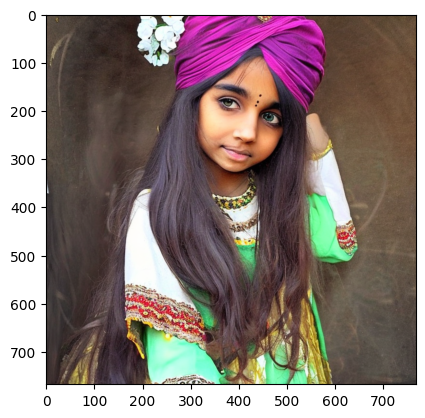

In [21]:
print('[prompt]:', prompt)

plt.imshow(image)
plt.show()

In [22]:
pipe = StableDiffusionPipeline.from_pretrained(model_id2, torch_dtype=torch.float16)
pipe = pipe.to("cuda")

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

In [24]:

prompt2= "dream like girl with dense and long hair, cute face like princess, some sweating in head, height is 5'.6, with indian dress"



[prompt]: dream like girl with dense and long hair, cute face like princess, some sweating in head, height is 5'.6, with indian dress


  0%|          | 0/50 [00:00<?, ?it/s]

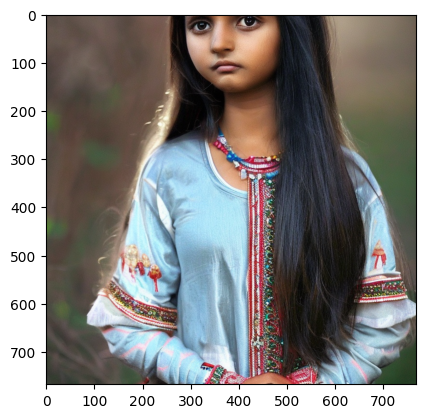

In [25]:
print('[prompt]:', prompt2)

image = pipe(prompt2).images[0]

plt.imshow(image)
plt.show()

In [35]:
def generate_image(pipe,prompt, param):
    images = pipe(prompt, **param).images
    print('[prompt]:', prompt)

    # Check if the output is a list of images or a single image
    if isinstance(images, list):
        num_images = len(images)
        if num_images > 1:
            fig, axes = plt.subplots(1, num_images, figsize=(20, 20))
            for i in range(num_images):
                axes[i].imshow(images[i])
                axes[i].axis('off')
            plt.tight_layout()
            plt.show()
        elif num_images == 1:
            # Handle the case of a single image in a list
            fig = plt.figure()
            plt.imshow(images[0])
            plt.axis('off')
            plt.show()
    else:
        # Handle the case of a single image object directly returned (less common but good to handle)
        fig = plt.figure()
        plt.imshow(images)
        plt.axis('off')
        plt.show()

In [27]:
prompt3= "dream like girl with dense and long hair, cute face like princess, some sweating in head, height is 5'.6, with indian dress"

In [32]:
param = {
    "num_inference_steps": 50,
    "guidance_scale": 7.5,
    "negative_prompt": """bad quality, low quality, worst quality,
    duplicate, morbid, mutilated, extra fingers, mutated hands, poorly"""
}

In [28]:
image = pipe(prompt3).images[0]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

[prompt]: dream like girl with dense and long hair, cute face like princess, some sweating in head, height is 5'.6, with indian dress


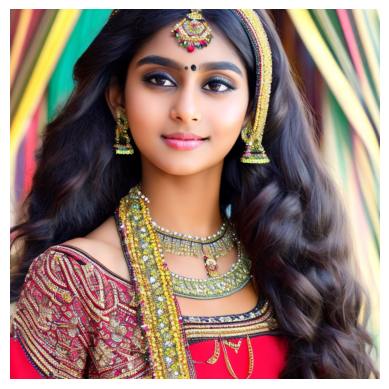

In [36]:
generate_image(pipe,prompt3, param)

In [34]:
# height, width

In [37]:
param = {
    "num_inference_steps": 100,

}


  0%|          | 0/100 [00:00<?, ?it/s]

[prompt]: dream like girl with dense and long hair, cute face like princess, some sweating in head, height is 5'.6, with indian dress


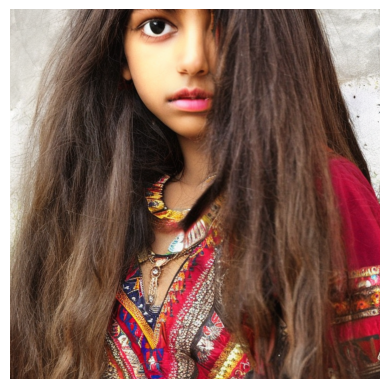

In [38]:
generate_image(pipe,prompt3, param)

  0%|          | 0/100 [00:00<?, ?it/s]

[prompt]: dream like girl with dense and long hair, cute face like princess, some sweating in head, height is 5'.6, with indian dress


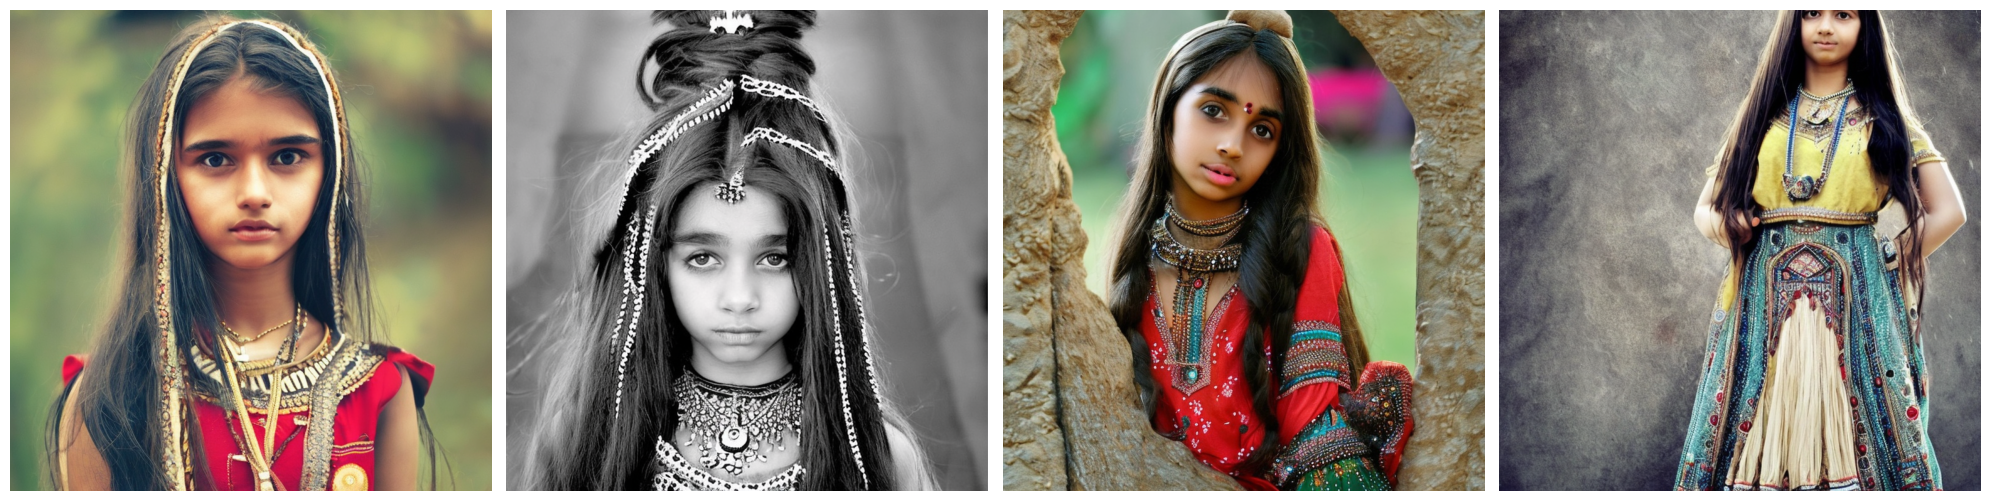

In [40]:
param = {
    "num_inference_steps": 100, 'num_images_per_prompt': 4
}
generate_image(pipe,prompt3, param)

  0%|          | 0/50 [00:00<?, ?it/s]

[prompt]: dream like girl with dense and long hair, cute face like princess, some sweating in head, height is 5'.6, with indian dress


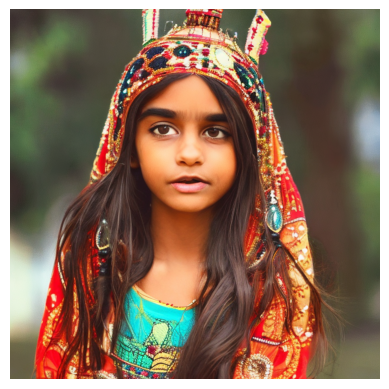

In [41]:
param = {
    "num_inference_steps": 50,
    "guidance_scale": 7.5}
generate_image = generate_image(pipe,prompt3, param)
